<a href="https://colab.research.google.com/github/othmanebenlamlih/data-mining/blob/main/Data_Mining_and_Machine_Learning_techniques_in_Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NB : les codes utilisés dans ce notebook sont adapté d'apres les sources suivants: <br/>
**courcera**  
> Applied Machine Learning in Python
> Introduction to Data Science in Python

**Kaggle**

> multiple_model_of_ML_and_deepLearning --> (https://www.kaggle.com/hasanmoni/multiple-model-of-ml-and-deeplearning)
> Cardiovascular Classification --> (https://www.kaggle.com/kazimshaikh/cardiovascular-classification)













In [ ]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Cleaning**


In [ ]:
from google.colab import drive 
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
os.chdir("/content/drive/MyDrive/datam")

In [ ]:
nRowsRead = 2000 # specify 'None' if want to read whole file
# montgomery_metadata.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df = pd.read_csv('/content/drive/MyDrive/datam/data.csv', delimiter=',', nrows = nRowsRead)
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1493 rows and 14 columns


In [ ]:
# data file
#df = pd.read_csv("myDATA.csv",encoding='latin1')


In [ ]:
df.head(2000)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,1,0.0,1.0
1,37,1,2,130,250,0,1,187,0,3.5,0,1,0.0,2.0
2,41,0,1,130,204,0,0,172,0,1.4,2,1,0.0,2.0
3,56,1,1,120,236,0,1,178,0,0.8,2,1,0.0,2.0
4,57,0,0,120,354,0,1,163,1,0.6,2,1,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488,45,1,1,110,264,0,0,132,0,1.2,2,1,NaN,NaN
1489,68,1,4,144,193,1,0,141,0,3.4,2,1,NaN,NaN
1490,57,1,4,130,131,0,0,115,1,1.2,2,1,NaN,NaN
1491,57,0,2,130,236,0,2,174,0,0.0,2,1,NaN,NaN


#  Columns


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'target', 'ca', 'thal'],
      dtype='object')

---

1.   ***age***: age in years.
2.   ***sex***: sex (1 = male; 0 = female).
3.   ***cp***: chest pain type :
        *   *Value* 1: typical angina
        *   *Value* 2: atypical angina
        *   *Value* 3: non-anginal pain
        *   *Value* 4: asymptomatic
4.   ***trestbps***: resting blood pressure (in mm Hg on admission to the hospital).
5.   ***chol***: serum cholestoral in mg/dl.
6.   ***fbs***: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false).
7.   ***restecg***: resting electrocardiographic results.
8.   ***thalach***: maximum heart rate achieved.
9.   ***exang***: exercise induced angina (1 = yes; 0 = no).
10.  ***oldpeak*** = ST depression induced by exercise relative to rest.
11.  ***slope***: the slope of the peak exercise ST segment:
        *   *Value* 1: upsloping
        *   *Value* 2: flat
        *   *Value* 3: downsloping
12.  ***ca***: number of major vessels (0-3) colored by flourosopy.
13.  ***thal***: 3 = normal; 6 = fixed defect; 7 = reversable defect.









---





In [ ]:
# Format de la source (nombre de lignes, nombre de colonnes)
df.shape

(1493, 14)

In [ ]:
#type of columns data
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
target        int64
ca          float64
thal        float64
dtype: object

In [ ]:
# Afficher des  informations sur les données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1493 entries, 0 to 1492
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1493 non-null   int64  
 1   sex       1493 non-null   int64  
 2   cp        1493 non-null   int64  
 3   trestbps  1493 non-null   int64  
 4   chol      1493 non-null   int64  
 5   fbs       1493 non-null   int64  
 6   restecg   1493 non-null   int64  
 7   thalach   1493 non-null   int64  
 8   exang     1493 non-null   int64  
 9   oldpeak   1493 non-null   float64
 10  slope     1493 non-null   int64  
 11  target    1493 non-null   int64  
 12  ca        303 non-null    float64
 13  thal      303 non-null    float64
dtypes: float64(3), int64(11)
memory usage: 163.4 KB


In [ ]:
# Affiche quelques statistiques sur les données [	Standard Deviation of the Values]
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target,ca,thal
count,1493.000000,1493.000000,1493.000000,1493.000000,1493.000000,1493.000000,1493.000000,1493.000000,1493.000000,1493.000000,1493.000000,1493.000000,303.000000,303.000000
mean,53.851306,0.747488,2.772940,132.046216,217.649699,0.200268,0.663764,141.744809,0.375084,0.946484,1.578701,0.531815,0.729373,2.313531
std,9.303455,0.434599,1.320601,18.198780,94.602143,0.400335,0.815076,25.318319,0.484307,1.102518,0.618093,0.499154,1.022606,0.612277
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,2.000000,120.000000,197.000000,0.000000,0.000000,123.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000
50%,54.000000,1.000000,3.000000,130.000000,232.000000,0.000000,0.000000,144.000000,0.000000,0.600000,2.000000,1.000000,0.000000,2.000000
75%,60.000000,1.000000,4.000000,140.000000,270.000000,0.000000,1.000000,161.000000,1.000000,1.600000,2.000000,1.000000,1.000000,3.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000,4.000000,3.000000


### - Change the case to Upper or lower


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'target', 'ca', 'thal'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.upper()

In [ ]:
df.columns

Index(['AGE', 'SEX', 'CP', 'TRESTBPS', 'CHOL', 'FBS', 'RESTECG', 'THALACH',
       'EXANG', 'OLDPEAK', 'SLOPE', 'TARGET', 'CA', 'THAL'],
      dtype='object')

### - Renaming Columns

In [ ]:
df.rename(columns = {'chol':'chol(mg/dl)'})

,AGE,SEX,CP,TRESTBPS,CHOL,FBS,RESTECG,THALACH,EXANG,OLDPEAK,SLOPE,TARGET,CA,THAL
0,63,1,3,145,233,1,0,150,0,2.3,0,1,0.0,1.0
1,37,1,2,130,250,0,1,187,0,3.5,0,1,0.0,2.0
2,41,0,1,130,204,0,0,172,0,1.4,2,1,0.0,2.0
3,56,1,1,120,236,0,1,178,0,0.8,2,1,0.0,2.0
4,57,0,0,120,354,0,1,163,1,0.6,2,1,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488,45,1,1,110,264,0,0,132,0,1.2,2,1,NaN,NaN
1489,68,1,4,144,193,1,0,141,0,3.4,2,1,NaN,NaN
1490,57,1,4,130,131,0,0,115,1,1.2,2,1,NaN,NaN
1491,57,0,2,130,236,0,2,174,0,0.0,2,1,NaN,NaN


## Checking for missing data


In [ ]:
#False means no missing data
df.isnull()

,AGE,SEX,CP,TRESTBPS,CHOL,FBS,RESTECG,THALACH,EXANG,OLDPEAK,SLOPE,TARGET,CA,THAL
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488,False,False,False,False,False,False,False,False,False,False,False,False,True,True
1489,False,False,False,False,False,False,False,False,False,False,False,False,True,True
1490,False,False,False,False,False,False,False,False,False,False,False,False,True,True
1491,False,False,False,False,False,False,False,False,False,False,False,False,True,True


In [ ]:
# Columns with NAN using True/False
# False means it doesn't have a NAN
df.isnull().any()

AGE         False
SEX         False
CP          False
TRESTBPS    False
CHOL        False
FBS         False
RESTECG     False
THALACH     False
EXANG       False
OLDPEAK     False
SLOPE       False
TARGET      False
CA           True
THAL         True
dtype: bool

In [ ]:
# checking for the entire DataFrame
df.isnull().any().any()

True

In [ ]:
# the number Columns with NAN
df.isnull().sum()

AGE            0
SEX            0
CP             0
TRESTBPS       0
CHOL           0
FBS            0
RESTECG        0
THALACH        0
EXANG          0
OLDPEAK        0
SLOPE          0
TARGET         0
CA          1190
THAL        1190
dtype: int64

In [ ]:
# Total Number of Missing data
df.isnull().sum().sum()

2380

##  Filling missing data with the mean of the values

In [ ]:
df.head(2000)

,AGE,SEX,CP,TRESTBPS,CHOL,FBS,RESTECG,THALACH,EXANG,OLDPEAK,SLOPE,TARGET,CA,THAL
0,63,1,3,145,233,1,0,150,0,2.3,0,1,0.0,1.0
1,37,1,2,130,250,0,1,187,0,3.5,0,1,0.0,2.0
2,41,0,1,130,204,0,0,172,0,1.4,2,1,0.0,2.0
3,56,1,1,120,236,0,1,178,0,0.8,2,1,0.0,2.0
4,57,0,0,120,354,0,1,163,1,0.6,2,1,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488,45,1,1,110,264,0,0,132,0,1.2,2,1,NaN,NaN
1489,68,1,4,144,193,1,0,141,0,3.4,2,1,NaN,NaN
1490,57,1,4,130,131,0,0,115,1,1.2,2,1,NaN,NaN
1491,57,0,2,130,236,0,2,174,0,0.0,2,1,NaN,NaN


In [ ]:
# Fill it with the mean
df['CA'].mean()

0.7293729372937293

In [ ]:
df['THAL'].mean()

2.3135313531353137

In [ ]:
#df['THAL'] = df.THAL.fillna(df['THAL'].mean())
#df['CA'] = df.CA.fillna(df['CA'].mean())

df.iloc[303:,df.columns.get_loc('CA')] = 1
df.iloc[303:,df.columns.get_loc('THAL')] = 2


In [ ]:
df.head(800)

,AGE,SEX,CP,TRESTBPS,CHOL,FBS,RESTECG,THALACH,EXANG,OLDPEAK,SLOPE,TARGET,CA,THAL
0,63,1,3,145,233,1,0,150,0,2.3,0,1,0.0,1.0
1,37,1,2,130,250,0,1,187,0,3.5,0,1,0.0,2.0
2,41,0,1,130,204,0,0,172,0,1.4,2,1,0.0,2.0
3,56,1,1,120,236,0,1,178,0,0.8,2,1,0.0,2.0
4,57,0,0,120,354,0,1,163,1,0.6,2,1,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,75,1,4,170,203,1,1,108,0,0.0,2,1,1.0,2.0
796,49,1,1,130,0,0,1,145,0,3.0,2,1,1.0,2.0
797,51,1,3,137,339,0,0,127,1,1.7,2,1,1.0,2.0
798,60,1,4,142,216,0,0,110,1,2.5,2,1,1.0,2.0


# VISUALISATION

## disease Distribution:

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


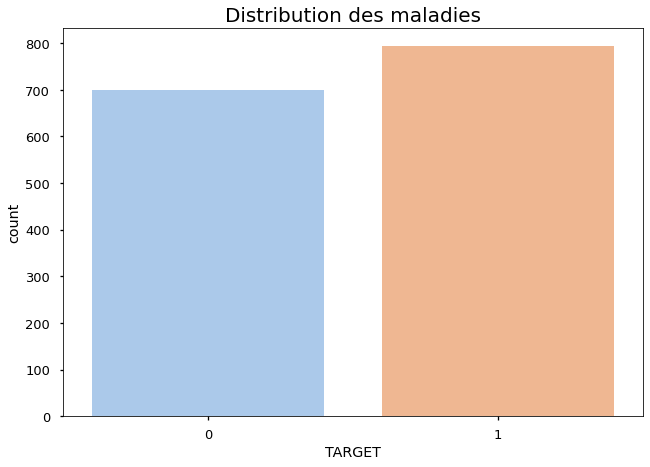

In [ ]:
plt.rcParams['figure.figsize'] = (15, 7)
plt.style.use('seaborn-talk')
sns.countplot(df['TARGET'], palette = 'pastel')
plt.title('Distribution des maladies', fontsize = 20)
plt.show()



---
We note that our database is fairly balanced, with a superiority of almost 100 cases that have  diseases.

---


## SEX Distribution BY disease :

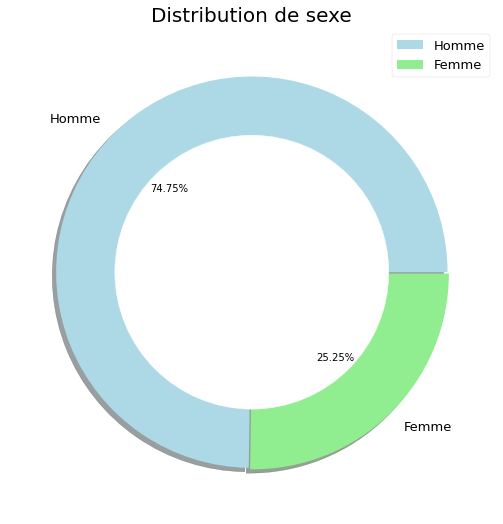

In [ ]:
size = df['SEX'].value_counts()
colors = ['lightblue', 'lightgreen']
labels = "Homme", "Femme"
explode = [0, 0.01]

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('Distribution de sexe', fontsize = 20)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

---

This pie chart shows that there is a big difference in the SEX. According to our study **74.75%** of patients are men while **25.25%** are women, which shows that more men have partiticipted to cardiovascular disease tests. 

---

## Relationship between sex and disease

In [ ]:
size = df.query("TARGET==1").groupby(["SEX"])["TARGET"].value_counts()
size 

SEX  TARGET
0    1         142
1    1         652
Name: TARGET, dtype: int64

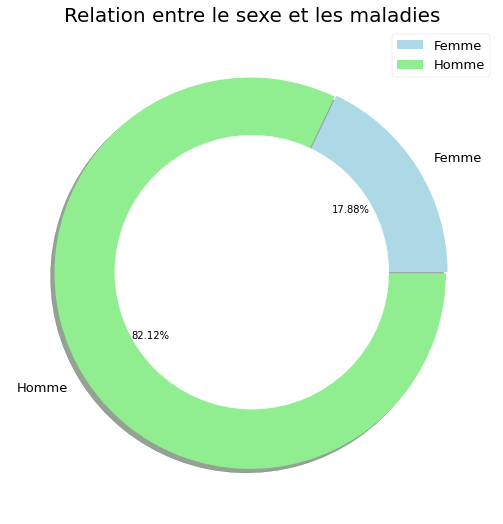

In [ ]:
colors = ['lightblue', 'lightgreen']
labels = "Femme", "Homme"
explode = [0, 0.01]

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('Relation entre le sexe et les maladies', fontsize = 20)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()



---
This pie chart shows that men are more than ***4*** times more likely to suffer from cardiovascular disease.

---


## AGE DISTRIBUTION OF THE DISEASE

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


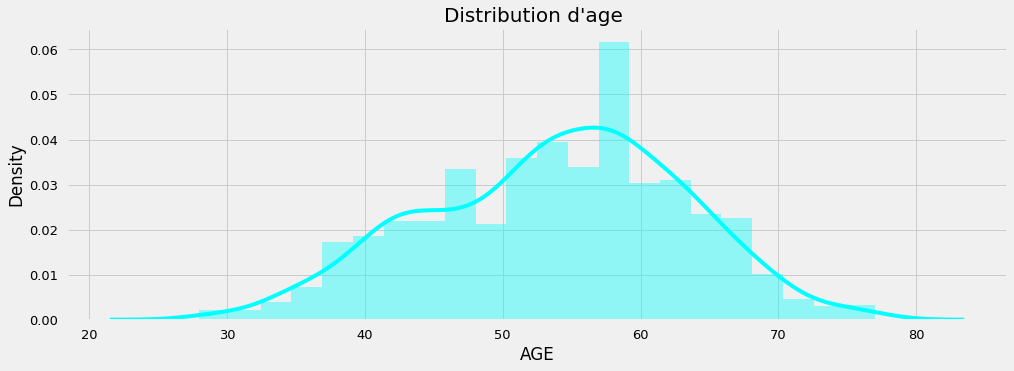

In [ ]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(df['AGE'], color = 'cyan')
plt.title("Distribution d'age ", fontsize = 20)
plt.show()

The distribution chart above shows that the highest number of people with cardiovascular disease is in the 50-65 age group. Patients in the*** 20-30*** age group are much less likely to suffer.
The number of patients in the ***65-80*** age group has a very small population, so the distribution is also smaller.

## Relationship between electrical acitivity of the heart and diseases:

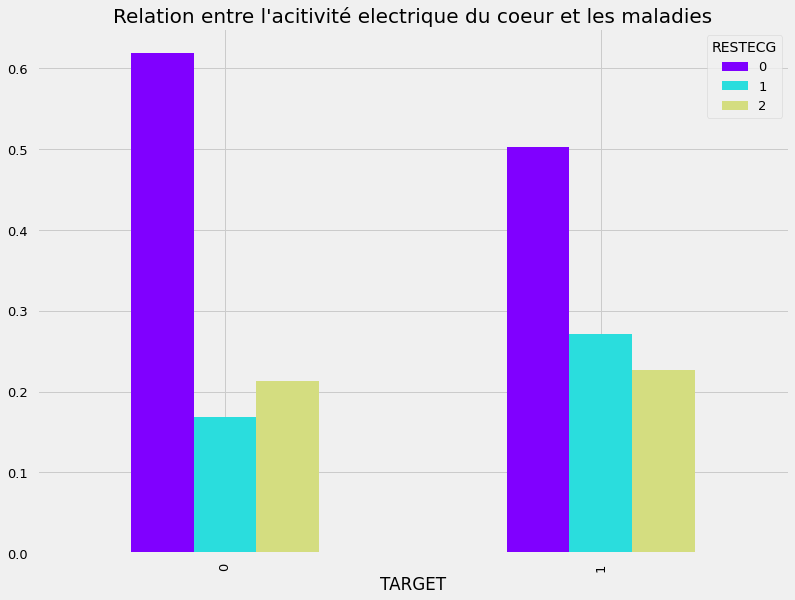

In [ ]:
plt.rcParams['figure.figsize'] = (12, 9)
dat = pd.crosstab(df['TARGET'], df['RESTECG']) 
dat.div(dat.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                 stacked = False, 
                                                 color = plt.cm.rainbow(np.linspace(0, 1, 4)))
plt.title("Relation entre l'acitivité electrique du coeur et les maladies", fontsize = 20, fontweight = 30)
plt.show()



---


This diagram shows that patients with electrical acitivity of the heart representing ***left ventricular hypertrophy*** are ***more likely to have cardiovascular disease***, while patients with normal activity are unlikely to have problems.


---



## Correlation between attributes:

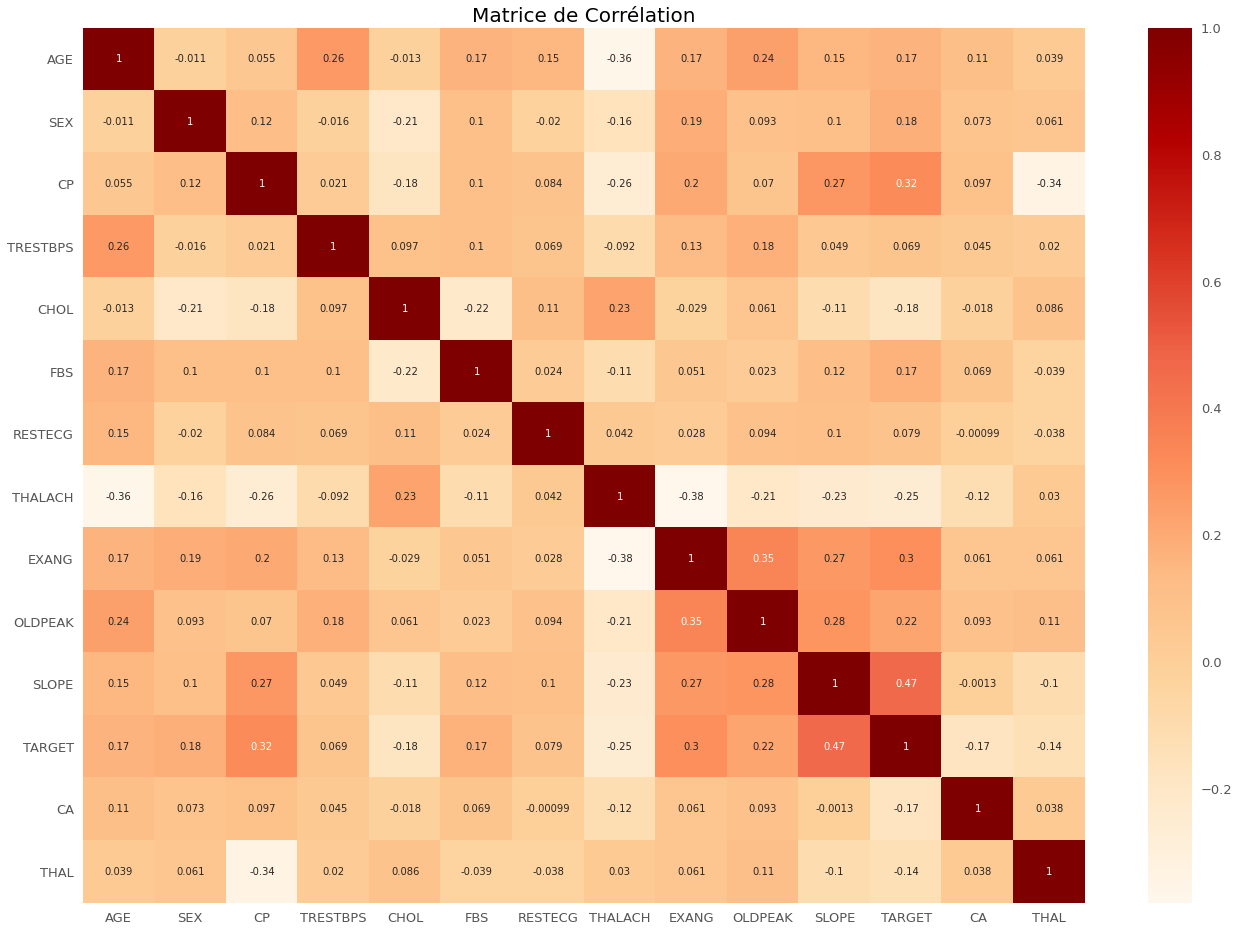

In [ ]:
plt.rcParams['figure.figsize'] = (20, 15)
plt.style.use('ggplot')

sns.heatmap(df.corr(), annot = True, cmap = 'OrRd')
plt.title('Matrice de Corrélation', fontsize = 20)
plt.show()



---
This heat map shows that the attributes are much less correlated with each other, so we move on to pca.

---





# **ACP** : l'Analyse à Composantes Principales

In [ ]:
# Import des librairies
import os 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import random

**Normalisation des données**

In [ ]:
features = ['AGE','TRESTBPS','CHOL','THALACH','OLDPEAK']

x = df[features]
x = StandardScaler().fit_transform(x)
n_entries=1493 

print("Les moyennes :",np.mean(x,axis=0))
print("\nLes écarts-types :",np.std(x,axis=0,ddof=0)) # les écarts type devraient être égals à 1
print("\nLa matrice de corrélation :\n",(1/n_entries)*np.matmul(np.transpose(x),x))

Les moyennes : [-3.80732879e-17  3.99769523e-16  1.33256508e-16  3.90251201e-16
  5.71099319e-17]

Les écarts-types : [1. 1. 1. 1. 1.]

La matrice de corrélation :
 [[ 1.          0.26136544 -0.01253838 -0.36469839  0.23847828]
 [ 0.26136544  1.          0.0967785  -0.09225643  0.17876992]
 [-0.01253838  0.0967785   1.          0.22801682  0.06117356]
 [-0.36469839 -0.09225643  0.22801682  1.         -0.20502989]
 [ 0.23847828  0.17876992  0.06117356 -0.20502989  1.        ]]


La fonction **fit_tranform**() renvoie en sortie les coordonnées factorielles que nous collections dans la variable principal_comps

In [ ]:
n_components=len(features)
pca = PCA()
principal_comps = pca.fit_transform(x)
print("Nombre de composantes principales : ",pca.n_components_)
print("\nValeurs propres :",pca.explained_variance_)
print("\nProportion des variances (pourcentage) : ",pca.explained_variance_ratio_*100)
corvar=pca.get_covariance()
print("\nMatrice des covariances :\n",corvar)

Nombre de composantes principales :  5

Valeurs propres : [1.69195277 1.19519351 0.82556454 0.72920901 0.56143137]

Proportion des variances (pourcentage) :  [33.8163903  23.88785951 16.5002317  14.57441185 11.22110662]

Matrice des covariances :
 [[ 1.00067024  0.26154062 -0.01254679 -0.36494283  0.23863812]
 [ 0.26154062  1.00067024  0.09684336 -0.09231827  0.17888974]
 [-0.01254679  0.09684336  1.00067024  0.22816965  0.06121456]
 [-0.36494283 -0.09231827  0.22816965  1.00067024 -0.20516731]
 [ 0.23863812  0.17888974  0.06121456 -0.20516731  1.00067024]]


On peut tracer la variance cumulée

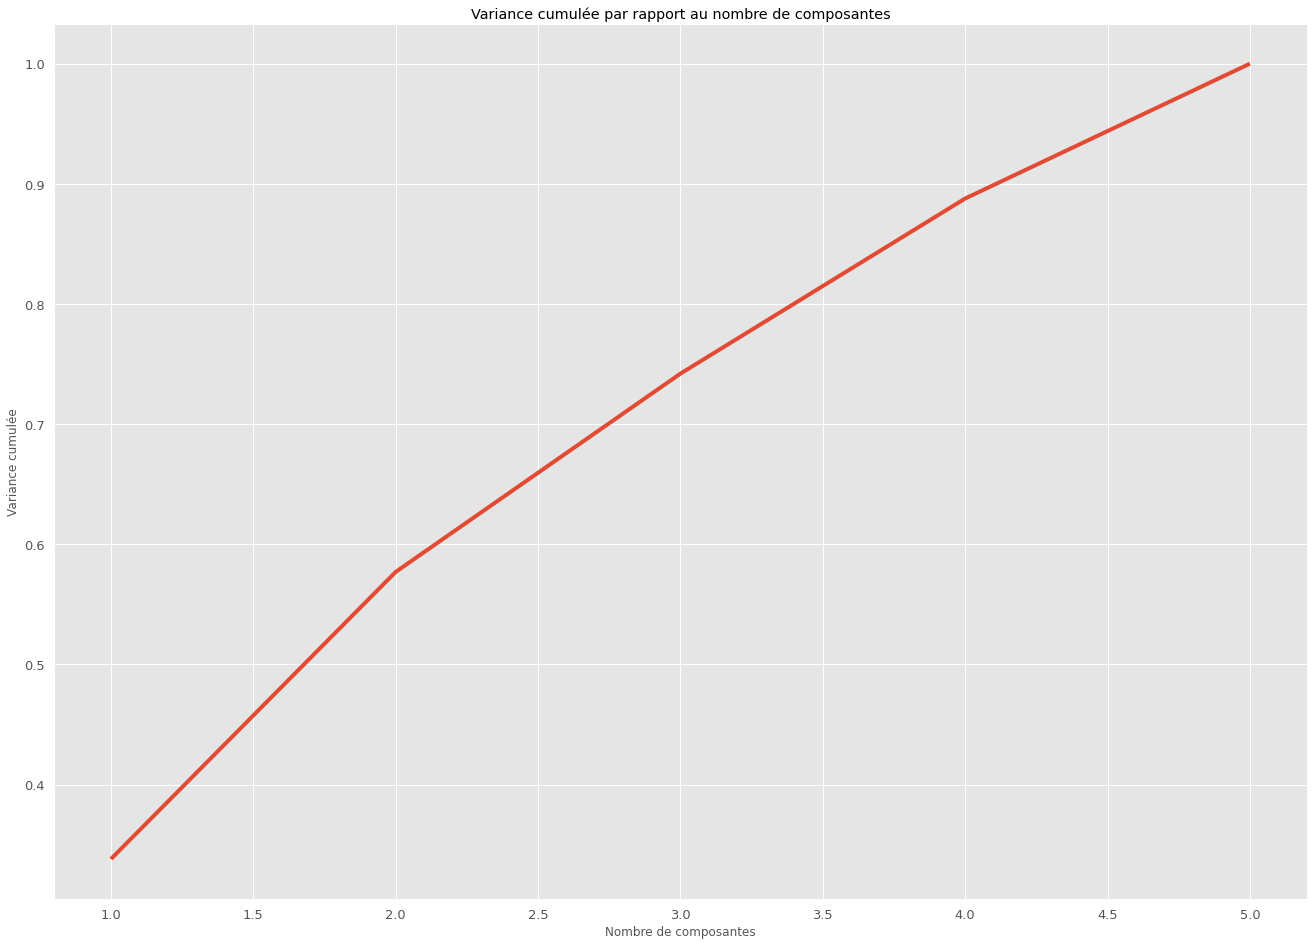

In [ ]:
plt.plot(np.arange(1,n_components+1),np.cumsum(pca.explained_variance_ratio_))
plt.title("Variance cumulée par rapport au nombre de composantes")
plt.ylabel("Variance cumulée")
plt.xlabel("Nombre de composantes")
plt.show()

On n'utilisera plus une valeur si la proportion de celle-ci est inférieure à 1/n_components (à savoir ici 14%) c'est 1/7. 

In [ ]:
n_components=3
pca = PCA(n_components)
principal_comps = pca.fit_transform(x)
print("Nombre de composantes principales : ",pca.n_components_)
print("\nValeurs propres :",pca.explained_variance_)
print("\nProportion des variances (pourcentage) : ",pca.explained_variance_ratio_*100)

Nombre de composantes principales :  3

Valeurs propres : [1.69195277 1.19519351 0.82556454]

Proportion des variances (pourcentage) :  [33.8163903  23.88785951 16.5002317 ]



**Affichage des composantes principales/vecteurs propres**

In [ ]:
# Calcul des vecteurs propres
# On obtient la matrice de changement de base
print("Matrice de changement de base :\n",pca.components_)
print("\nComposantes principales :\n",principal_comps)

Matrice de changement de base :
 [[ 0.58864283  0.39866057 -0.08895343 -0.5285015   0.45534912]
 [-0.02421417 -0.42742847 -0.76985934 -0.41535912 -0.22696249]
 [-0.15653883 -0.64561917  0.1917263  -0.07450696  0.71858279]]

Composantes principales :
 [[ 1.23528765 -0.8673246   0.27560086]
 [-1.03184004 -1.43992252  1.95346271]
 [-1.28979094 -0.39725771  0.46787043]
 ...
 [ 0.899158    1.13195912  0.08797001]
 [-0.9273764  -0.44393759 -0.65522368]
 [-1.87637212 -0.0694388  -0.74005143]]



**Représentation de l'age des individus**

Pour visualiser et vérifier les résultats, on affiche l'age des individus dans un dataframe et dans un plot à l'emplacement correspondant à l'ACP. l'age des individus proches auront à chaque fois leurs composantes proches.


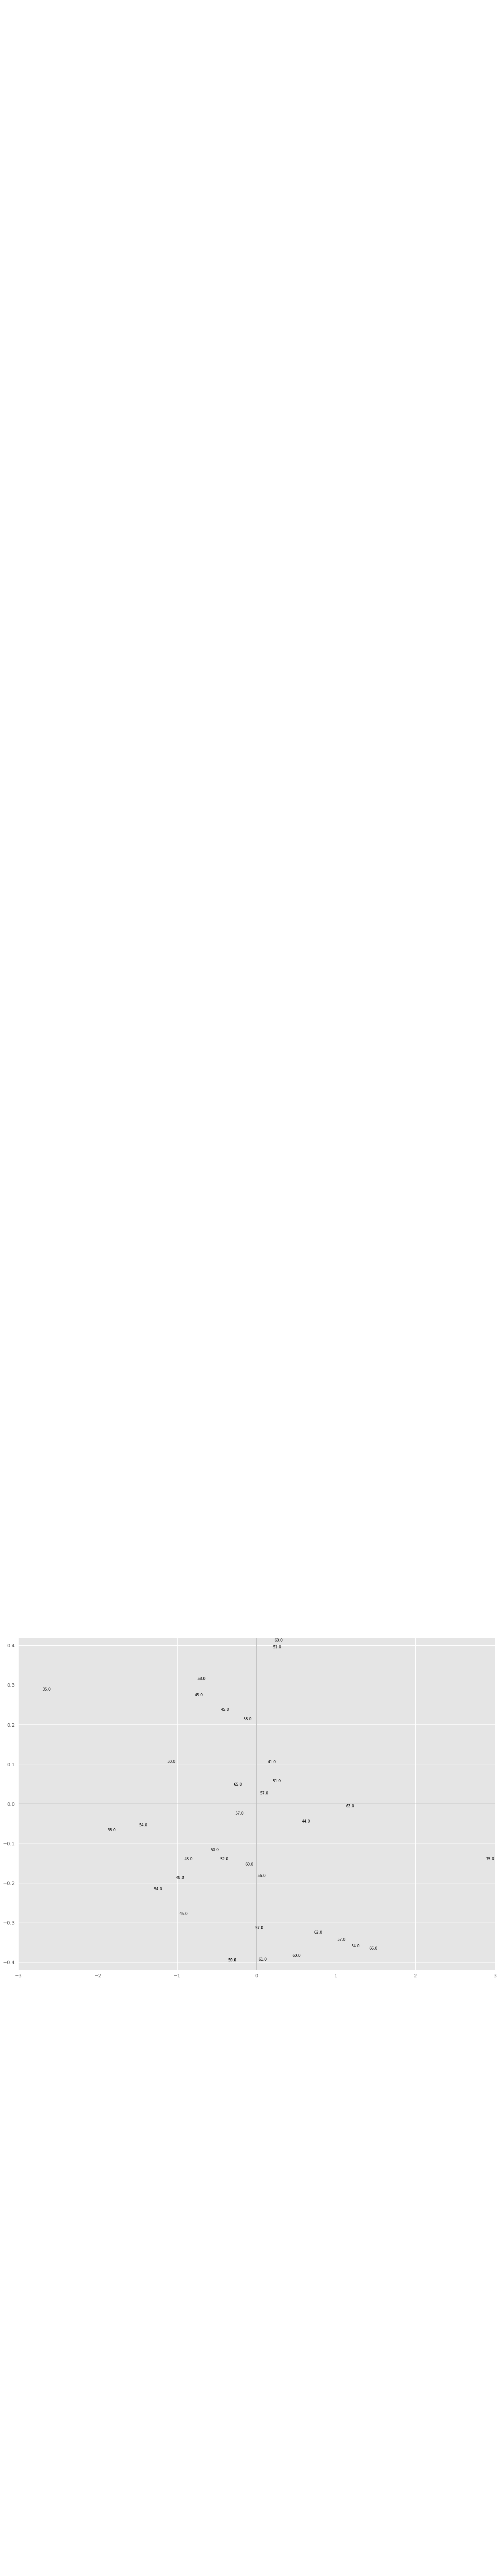

,AGE,SEX,CP,TRESTBPS,CHOL,FBS,RESTECG,THALACH,EXANG,OLDPEAK,SLOPE,TARGET,CA,THAL
0,61.0,1.0,0.0,148.0,203.0,0.0,1.0,161.0,0.0,0.0,2.0,0.0,1.0,3.0
1,57.0,1.0,1.0,124.0,261.0,0.0,1.0,141.0,0.0,0.3,2.0,0.0,0.0,3.0
2,48.0,1.0,3.0,102.0,0.0,1.0,1.0,110.0,1.0,1.0,3.0,1.0,1.0,2.0
3,58.0,1.0,1.0,125.0,220.0,0.0,1.0,144.0,0.0,0.4,1.0,1.0,4.0,3.0
4,57.0,1.0,0.0,140.0,192.0,0.0,1.0,148.0,0.0,0.4,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,41.0,1.0,2.0,120.0,295.0,0.0,0.0,170.0,0.0,0.0,1.0,0.0,1.0,2.0
76,35.0,0.0,1.0,120.0,160.0,0.0,1.0,185.0,0.0,0.0,1.0,0.0,1.0,2.0
77,58.0,1.0,3.0,105.0,240.0,0.0,2.0,154.0,1.0,0.6,2.0,0.0,1.0,2.0
78,41.0,1.0,0.0,110.0,172.0,0.0,0.0,158.0,0.0,0.0,2.0,0.0,0.0,3.0


In [ ]:
# Positionnement de df dans le premier plan
fig, axes = plt.subplots()
tmp_df=pd.DataFrame(columns=list(df))
# Placement des étiquettes des observations
for i in range(80):
    r=random.randint(0,n_entries)
    tmp_df.loc[i]=df.iloc[r]
    plt.annotate(tmp_df.loc[i].AGE,(principal_comps[r,0],principal_comps[r,1]))
    
# Ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
plt.margins(x=-.25, y=-0.465)
# Affichage
plt.show()
tmp_df


**Qualité de représentation**

scikit ne dispose pas d'outil pour afficher directement le cos carré. Nous devons le faire à la main.


In [ ]:
# Contribution de l'age des individus dans l'inertie totale
dist = np.sum(x**2,axis=1)
print("Contribution de l'age des individus dans l'inertie totale :\n",dist)
# Qualité de la représentation des results
cos2 = principal_comps**2
for i in range(n_components):
    cos2[:,i] = cos2[:,i]/dist
print("\nQualité de la représentation (pourcentage) :\n",cos2*100)

Contribution de l'age des individus dans l'inertie totale :
 [ 3.11553368 11.9775789   3.54116515 ...  2.13629209  2.52652371
  5.47785331]

Qualité de la représentation (pourcentage) :
 [[48.97830452 24.14520385  2.43797184]
 [ 8.88905737 17.31048384 31.85966543]
 [46.97777744  4.45654707  6.18165852]
 ...
 [37.84525103 59.97922565  0.36225018]
 [34.03993367  7.80046462 16.99244199]
 [64.27284825  0.08802256  9.99800637]]



**Contributions aux axes**

In [ ]:
# Contributions aux axes
ctr = principal_comps**2
for j in range(n_components):
    ctr[:,j] = ctr[:,j]/(n_entries*pca.explained_variance_[j])

print("Contribution aux axes (10 permiers) : \n")
print(pd.DataFrame({'Axe 1':ctr[:,0],'Axe 2':ctr[:,1]}).head(10))

Contribution aux axes (10 permiers) : 

          Axe 1         Axe 2
0  6.040712e-04  4.215657e-04
1  4.214797e-04  1.161931e-03
2  6.585528e-04  8.843957e-05
3  3.669714e-04  1.069096e-04
4  2.407964e-04  6.937354e-04
5  6.756957e-07  3.125874e-07
6  8.848451e-06  6.434181e-04
7  1.542306e-03  8.029793e-05
8  1.123527e-05  5.859297e-04
9  2.202672e-05  2.666168e-04



**Représentation des variables**

Cercle des corrélations

In [ ]:
# Corrélations entre variables et facteurs
sqrt_vp = np.sqrt(pca.explained_variance_)
varfac = np.zeros((len(features),len(features)))
for i in range(n_components): 
    varfac[:,i] = pca.components_[i,:] * sqrt_vp[i]

print(pd.DataFrame({'Variable':features,'Composante 1':varfac[:,0],'Composante 2':varfac[:,1]}))

   Variable  Composante 1  Composante 2
0       AGE      0.765678     -0.026472
1  TRESTBPS      0.518558     -0.467286
2      CHOL     -0.115706     -0.841648
3   THALACH     -0.687449     -0.454091
4   OLDPEAK      0.592296     -0.248127


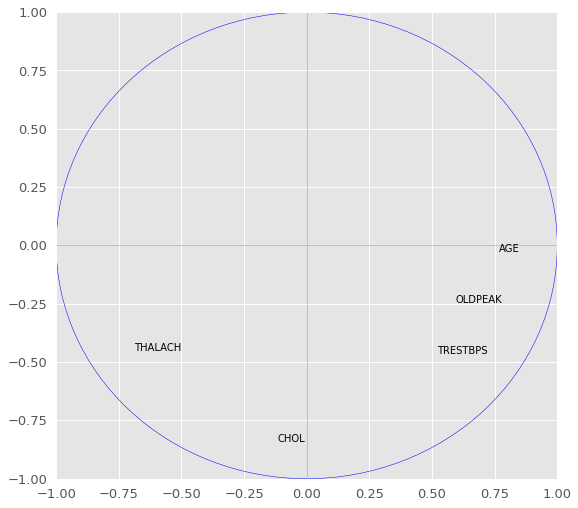

In [ ]:
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
# Affichage des étiquettes (noms des variables)
for j in range(len(features)):
    plt.annotate(features[j],(varfac[j,0],varfac[j,1]))

# Ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
# Ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
# Affichage
plt.show()

**Conclusion**

Nous avons pu voir à l'aide de cette application comment effectuer une Analyse à Composantes Principales et exploiter ses données. En effet, elle nous a donné assez peu d'informations significatives.

In [ ]:
#Suppression des colonnes 
#data = df.drop(['CP', 'FBS', 'RESTECG','EXANG', 'SLOPE'], 1)

# ML

## Package

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image 

## Encodage de colonnes catégoriques

In [ ]:
#On determine les colonnes non numeric
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
non_numeric=df.select_dtypes(exclude=numerics).columns

In [ ]:
#Separation des colonnes catégoriques et continues non numéric
Colonnes_catégoriques = []
Colonnes_continues = []
for i in non_numeric:
    print('--------------------------')
    print(f"{i} : {df[i].unique()}")
    if len(df[i].unique()) <= 2:
        Colonnes_catégoriques.append(i)
    else:
        Colonnes_continues.append(i)

In [ ]:
#Colonnes catégoriques
Colonnes_catégoriques

[]

In [ ]:
#Colonnes continues
Colonnes_continues

[]



---

dont on va pas avoir besoin de phase de ***Label Encoder*** et ***One-Hot Encoding*** :



---




## Standardisation des données :

## algorithmes du Machine Learning

In [ ]:
df

,AGE,SEX,CP,TRESTBPS,CHOL,FBS,RESTECG,THALACH,EXANG,OLDPEAK,SLOPE,TARGET,CA,THAL
0,63,1,3,145,233,1,0,150,0,2.3,0,1,0.0,1.0
1,37,1,2,130,250,0,1,187,0,3.5,0,1,0.0,2.0
2,41,0,1,130,204,0,0,172,0,1.4,2,1,0.0,2.0
3,56,1,1,120,236,0,1,178,0,0.8,2,1,0.0,2.0
4,57,0,0,120,354,0,1,163,1,0.6,2,1,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488,45,1,1,110,264,0,0,132,0,1.2,2,1,1.0,2.0
1489,68,1,4,144,193,1,0,141,0,3.4,2,1,1.0,2.0
1490,57,1,4,130,131,0,0,115,1,1.2,2,1,1.0,2.0
1491,57,0,2,130,236,0,2,174,0,0.0,2,1,1.0,2.0


In [ ]:
Sc=StandardScaler()
#Colonnes continue numéric
#Mise en échelle
data = df
data[['AGE','TRESTBPS','CHOL','THALACH','OLDPEAK']]=Sc.fit_transform(data[['AGE','TRESTBPS','CHOL','THALACH','OLDPEAK']])

In [ ]:
data

,AGE,SEX,CP,TRESTBPS,CHOL,FBS,RESTECG,THALACH,EXANG,OLDPEAK,SLOPE,TARGET,CA,THAL
0,0.983695,1,3,0.712033,0.162316,1,0,0.326165,0,1.228071,0,1,0.0,1.0
1,-1.811902,1,2,-0.112475,0.342076,0,1,1.788047,0,2.316853,0,1,0.0,2.0
2,-1.381810,0,1,-0.112475,-0.144334,0,0,1.195392,0,0.411484,2,1,0.0,2.0
3,0.231034,1,1,-0.662146,0.194038,0,1,1.432454,0,-0.132907,2,1,0.0,2.0
4,0.338557,0,0,-0.662146,1.441785,0,1,0.839800,1,-0.314371,2,1,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488,-0.951719,1,1,-1.211818,0.490114,0,0,-0.385021,0,0.230020,2,1,1.0,2.0
1489,1.521309,1,4,0.657065,-0.260649,1,0,-0.029428,0,2.226121,2,1,1.0,2.0
1490,0.338557,1,4,-0.112475,-0.916245,0,0,-1.056696,1,0.230020,2,1,1.0,2.0
1491,0.338557,0,2,-0.112475,0.194038,0,2,1.274413,0,-0.858762,2,1,1.0,2.0


### *Cross Validation (K-fold) :*
_____

In [ ]:
Image(url="https://miro.medium.com/max/1000/1*PdwlCactbJf8F8C7sP-3gw.png")

In [ ]:
import pandas as pd
data_train, data_test = train_test_split(df,random_state= 42, stratify=df['TARGET'])
#target
y_train = data_train['TARGET']
y_test = data_test['TARGET']
#features
X_train = data_train.drop('TARGET',axis=1)  
X_test = data_test.drop('TARGET',axis=1)  

k_fold = KFold(n_splits=5, shuffle=True, random_state=0)





In [ ]:
y_train

969     1
1027    1
361     0
1176    0
1272    0
       ..
1052    0
858     0
976     1
580     1
348     0
Name: TARGET, Length: 1119, dtype: int64

In [ ]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1488    1
1489    1
1490    1
1491    1
1492    0
Name: TARGET, Length: 1493, dtype: int64

### ***Logistic Regression :***

In [ ]:
LR = LogisticRegression()
scoring = 'accuracy'
scoreLR = (cross_val_score(LR,x,y,cv=k_fold, n_jobs=1, scoring=scoring))
scoreLR.round(2)

array([0.82, 0.84, 0.81, 0.8 , 0.79])

In [ ]:
round(scoreLR.mean(),5)

0.80976

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html
y_pred = cross_val_predict(LR,X_train,y_train, cv=k_fold)

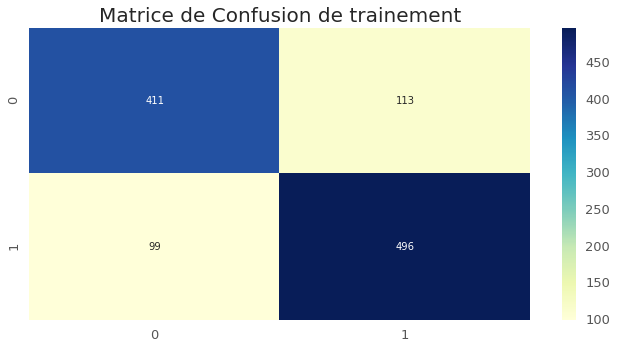

In [ ]:
confusionmatrix=confusion_matrix(y_train,y_pred)
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('ggplot')

sns.heatmap(confusionmatrix, annot=True, cmap="YlGnBu", fmt=".0f")
plt.title('Matrice de Confusion de trainement', fontsize = 20)
plt.show()

***testing***

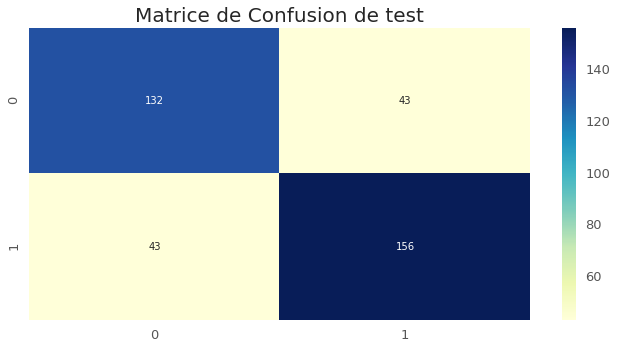

In [ ]:
y_pred = cross_val_predict(LR, X_test,y_test , cv=k_fold)
confusionmatrix=confusion_matrix(y_test,y_pred)
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('ggplot')

sns.heatmap(confusionmatrix, annot=True, cmap="YlGnBu", fmt=".0f")
plt.title('Matrice de Confusion de test', fontsize = 20)
plt.show()

### **Random Forest :**

In [ ]:
Image(url='https://i.ytimg.com/vi/goPiwckWE9M/maxresdefault.jpg')

In [ ]:
randomforest_classifier= RandomForestClassifier(n_estimators=10)
scoring = 'accuracy'
scoreRF = (cross_val_score(randomforest_classifier,x,y, cv=k_fold, n_jobs=1, scoring=scoring))
scoreRF.round(2)

array([0.9 , 0.9 , 0.86, 0.86, 0.89])

In [ ]:
round(scoreRF.mean(),5)

0.88077

In [ ]:
y_pred = cross_val_predict(randomforest_classifier,X_train,y_train, cv=k_fold)
confusionmatrix=confusion_matrix(y_train,y_pred)

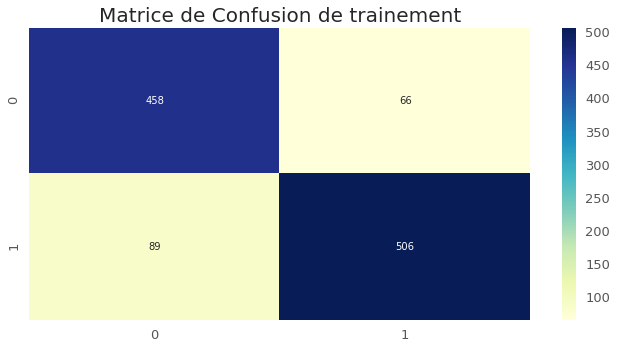

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('ggplot')

sns.heatmap(confusionmatrix, annot=True, cmap="YlGnBu", fmt=".0f")
plt.title('Matrice de Confusion de trainement', fontsize = 20)
plt.show()

***testing***

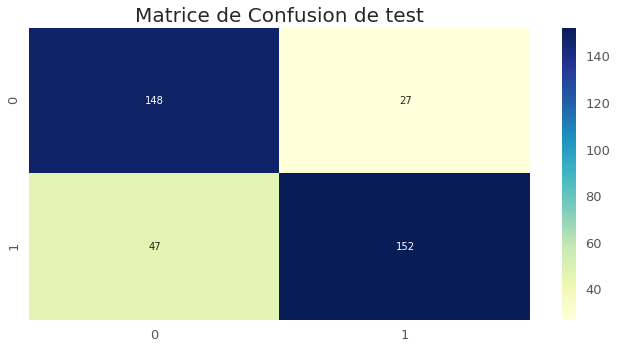

In [ ]:
y_pred = cross_val_predict(randomforest_classifier,X_test,y_test, cv=k_fold)
confusionmatrix=confusion_matrix(y_test,y_pred)
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('ggplot')

sns.heatmap(confusionmatrix, annot=True, cmap="YlGnBu", fmt=".0f")
plt.title('Matrice de Confusion de test', fontsize = 20)
plt.show()

### **Arbre de decision :**

In [ ]:
Image(url="https://static.javatpoint.com/tutorial/machine-learning/images/decision-tree-classification-algorithm.png")

In [ ]:
DecisionTree = DecisionTreeClassifier()
scoring = 'accuracy'
scoreDT = (cross_val_score(DecisionTree,x,y, cv=k_fold, n_jobs=1, scoring=scoring))
scoreDT.round(2)

array([0.87, 0.85, 0.85, 0.86, 0.84])

In [ ]:
round(scoreDT.mean(),5)

0.85465

In [ ]:
y_pred = cross_val_predict(DecisionTree,X_train,y_train, cv=k_fold)

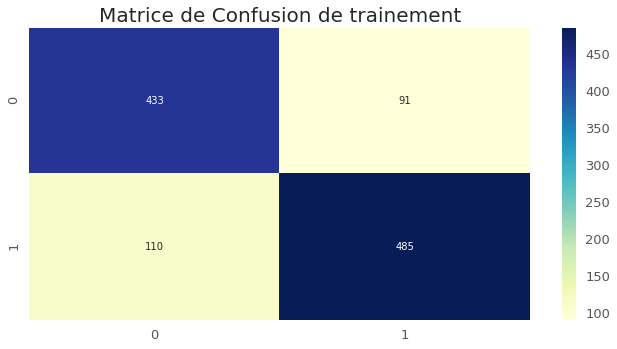

In [ ]:
confusionmatrix=confusion_matrix(y_train,y_pred)
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('ggplot')

sns.heatmap(confusionmatrix, annot=True, cmap="YlGnBu", fmt=".0f")
plt.title('Matrice de Confusion de trainement', fontsize = 20)
plt.show()

***testing***

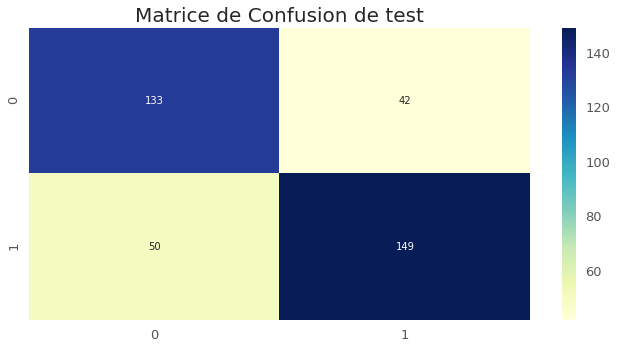

In [ ]:
y_pred = cross_val_predict(DecisionTree,X_test,y_test, cv=k_fold)
confusionmatrix=confusion_matrix(y_test,y_pred)
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('ggplot')

sns.heatmap(confusionmatrix, annot=True, cmap="YlGnBu", fmt=".0f")
plt.title('Matrice de Confusion de test', fontsize = 20)
plt.show()

### **Naive Baiyes** :

In [ ]:
Image(url="https://s3.ap-south-1.amazonaws.com/techleer/204.png")

In [ ]:
NB = GaussianNB()
scoring = 'accuracy'
scoreNB = (cross_val_score(NB,x,y, cv=k_fold, n_jobs=1, scoring=scoring))
scoreNB.round(2)

array([0.74, 0.78, 0.75, 0.74, 0.74])

In [ ]:
round(scoreNB.mean(),5)

0.75016

In [ ]:
y_pred = cross_val_predict(NB, X_train,y_train, cv=k_fold)

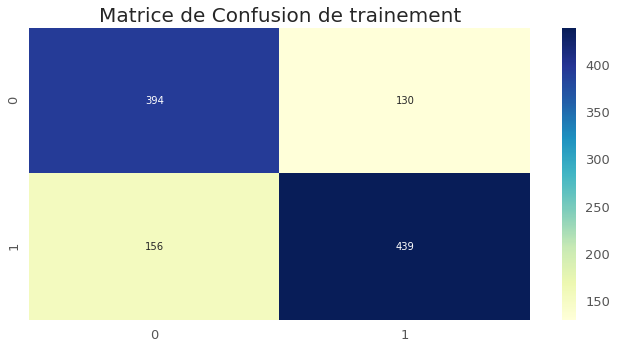

In [ ]:
confusionmatrix=confusion_matrix(y_train,y_pred)
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('ggplot')

sns.heatmap(confusionmatrix, annot=True, cmap="YlGnBu", fmt=".0f")
plt.title('Matrice de Confusion de trainement', fontsize = 20)
plt.show()

***testing***

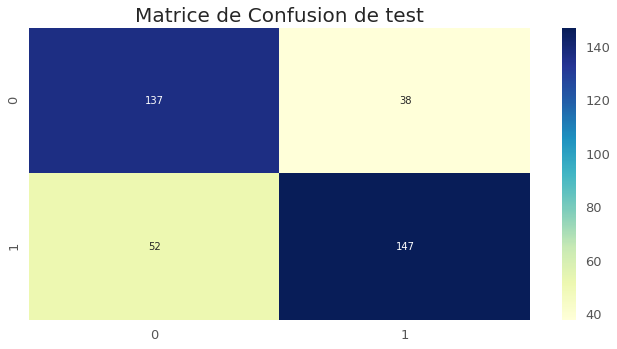

In [ ]:
y_pred = cross_val_predict(NB,X_test,y_test, cv=k_fold)
confusionmatrix=confusion_matrix(y_test,y_pred)
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('ggplot')

sns.heatmap(confusionmatrix, annot=True, cmap="YlGnBu", fmt=".0f")
plt.title('Matrice de Confusion de test', fontsize = 20)
plt.show()

### **SVM (Support vector machine) :**

In [ ]:
Image(url="https://static.javatpoint.com/tutorial/machine-learning/images/support-vector-machine-algorithm.png")

In [ ]:
SVM = SVC()
scoring = 'accuracy'
scoreSVM = (cross_val_score(SVM,x,y, cv=k_fold, n_jobs=1, scoring=scoring))
scoreSVM.round(2)

array([0.85, 0.84, 0.82, 0.8 , 0.83])

In [ ]:
round(scoreSVM.mean(),5)

0.82718

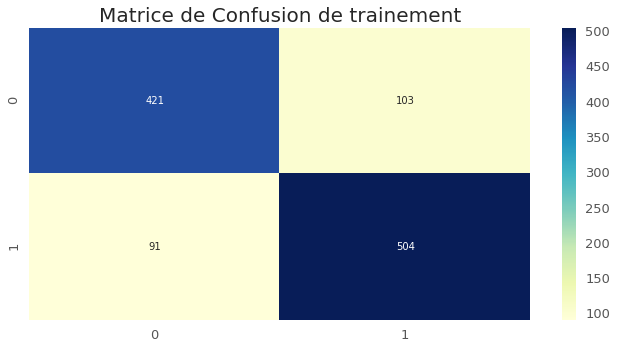

In [ ]:
y_pred = cross_val_predict(SVM,X_train,y_train, cv=k_fold)
confusionmatrix=confusion_matrix(y_train,y_pred)
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('ggplot')

sns.heatmap(confusionmatrix, annot=True, cmap="YlGnBu", fmt=".0f")
plt.title('Matrice de Confusion de trainement', fontsize = 20)
plt.show()

***testing***

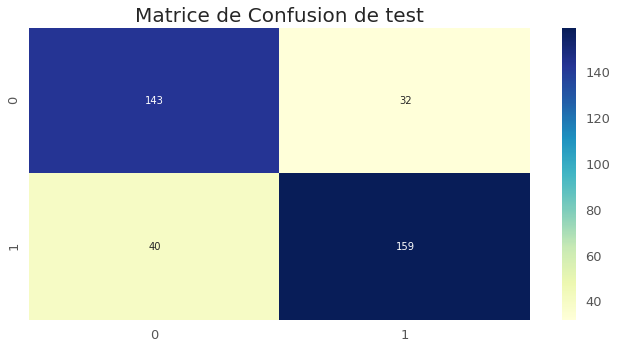

In [ ]:
y_pred = cross_val_predict(SVM,X_test,y_test, cv=k_fold)
confusionmatrix=confusion_matrix(y_test,y_pred)
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('ggplot')

sns.heatmap(confusionmatrix, annot=True, cmap="YlGnBu", fmt=".0f")
plt.title('Matrice de Confusion de test', fontsize = 20)
plt.show()

### **Algorithme KNN (k-nearest neighbors) :**

In [ ]:
Image(url="http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final_a1mrv9.png")


In [ ]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    scoring = 'accuracy'
    score = (cross_val_score(knn_classifier,x,y,cv=k_fold, n_jobs=1, scoring=scoring))
    knn_scores.append(score.mean().round(3))

In [ ]:
knn_scores

[0.854,
 0.807,
 0.813,
 0.806,
 0.822,
 0.805,
 0.819,
 0.811,
 0.816,
 0.812,
 0.816,
 0.804,
 0.81,
 0.804,
 0.807,
 0.808,
 0.804,
 0.808,
 0.81,
 0.813]

Text(0.5, 1.0, 'K Neighbors Classifier scores pour différente valeurs de K')

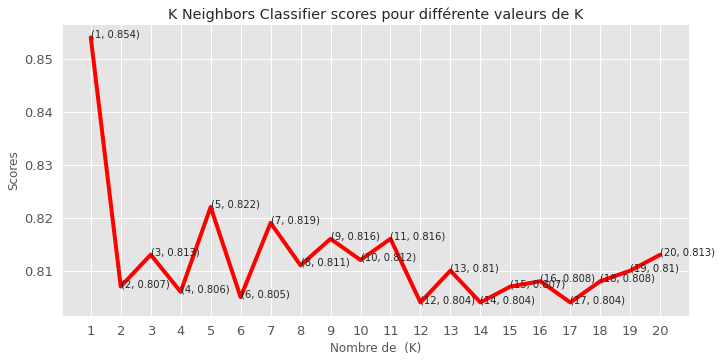

In [ ]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Nombre de  (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores pour différente valeurs de K')

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors = 1)
scoring = 'accuracy'
scoreKNN = (cross_val_score(knn_classifier,x,y, cv=k_fold, n_jobs=1, scoring=scoring))
scoreKNN.round(2)

array([0.86, 0.87, 0.86, 0.86, 0.82])

In [ ]:
round(scoreKNN.mean(),5)

0.85397

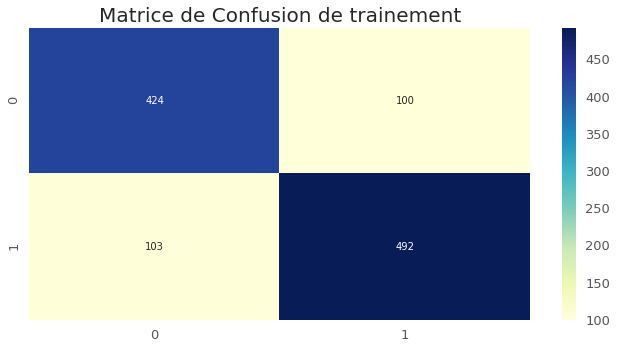

In [ ]:
y_pred = cross_val_predict(knn_classifier,X_train,y_train, cv=k_fold)
confusionmatrix=confusion_matrix(y_train,y_pred)
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('ggplot')

sns.heatmap(confusionmatrix, annot=True, cmap="YlGnBu", fmt=".0f")
plt.title('Matrice de Confusion de trainement', fontsize = 20)
plt.show()

***testing***

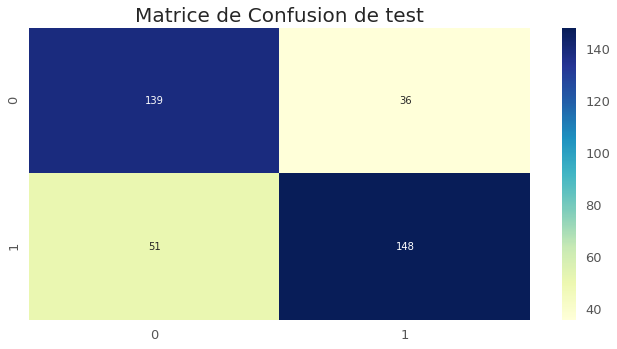

In [ ]:
y_pred = cross_val_predict(knn_classifier,X_test,y_test, cv=k_fold)
confusionmatrix=confusion_matrix(y_test,y_pred)
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('ggplot')

sns.heatmap(confusionmatrix, annot=True, cmap="YlGnBu", fmt=".0f")
plt.title('Matrice de Confusion de test', fontsize = 20)
plt.show()

# **Comparaison des modèles :**

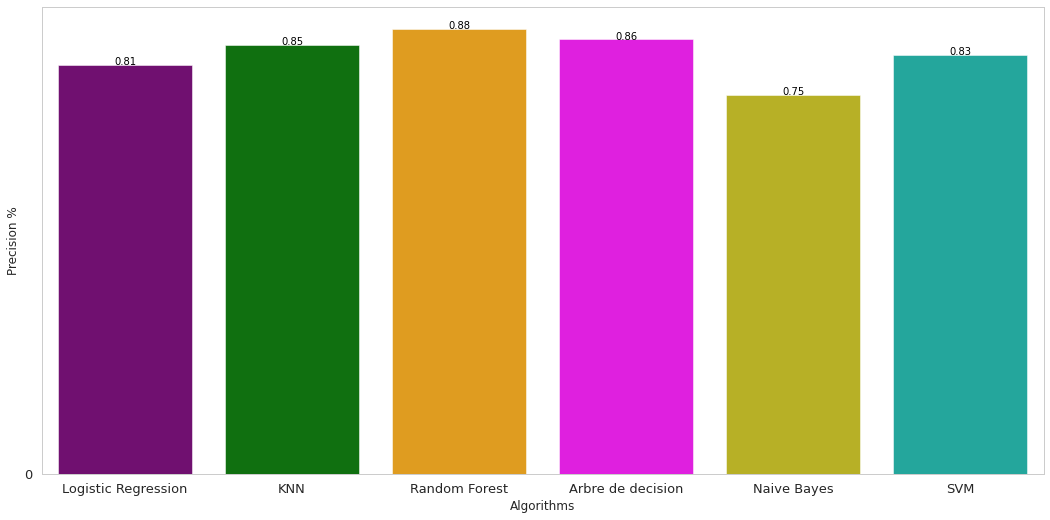

In [ ]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]
X=['Logistic Regression','KNN','Random Forest','Arbre de decision','Naive Bayes','SVM']
Y=[round(scoreLR.mean(),2),round(scoreKNN.mean(),2),round(scoreRF.mean(),2),round(scoreDT.mean(),2),round(scoreNB.mean(),2),round(scoreSVM.mean(),2)]
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Precision %")
plt.xlabel("Algorithms")
g=sns.barplot(X, Y, palette=colors)
for i in range(len(Y)):
    g.text(i, Y[i],Y[i],color='black', ha="center")
plt.show()